<a href="https://colab.research.google.com/github/Sk8133/STML-2424/blob/main/stml_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
housing=pd.read_csv('/content/archive (4).zip')
columns = ['latitude','total_rooms','housing_median_age','total_bedrooms']
data = housing[columns]
mle_params = {}
for column in columns:
    mean=np.mean(data[column])
    std_dev=np.std(data[column])
    mle_params[column]={'mean':mean,'std_dev':std_dev}

print ("Maximum Likelihood Parameter:")
print (mle_params )

Maximum Likelihood Parameter:
{'latitude': {'mean': 35.63186143410853, 'std_dev': 2.135900653797483}, 'total_rooms': {'mean': 2635.7630813953488, 'std_dev': 2181.5624017359723}, 'housing_median_age': {'mean': 28.639486434108527, 'std_dev': 12.585252725724606}, 'total_bedrooms': {'mean': 537.8705525375618, 'std_dev': 421.37475856260727}}


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
df = pd.read_csv('/content/archive (4).zip')
latitude=df['latitude']
latitude_mean=latitude.mean()
latitude_variance=latitude.var()

def log_likelihood(x, mean, variance):
  std_dev = np.sqrt(variance)
  return norm.logpdf(x, mean, std_dev)

values_to_test = [50, 75, 80]
log_likelihoods = {x:log_likelihood(x, latitude_mean, latitude_variance) for x in values_to_test}

max_likelihood_value = latitude_mean
log_likelihoods, max_likelihood_value

({50: -24.30281431158358, 75: -171.5321826426145, 80: -217.41715959503813},
 35.63186143410853)

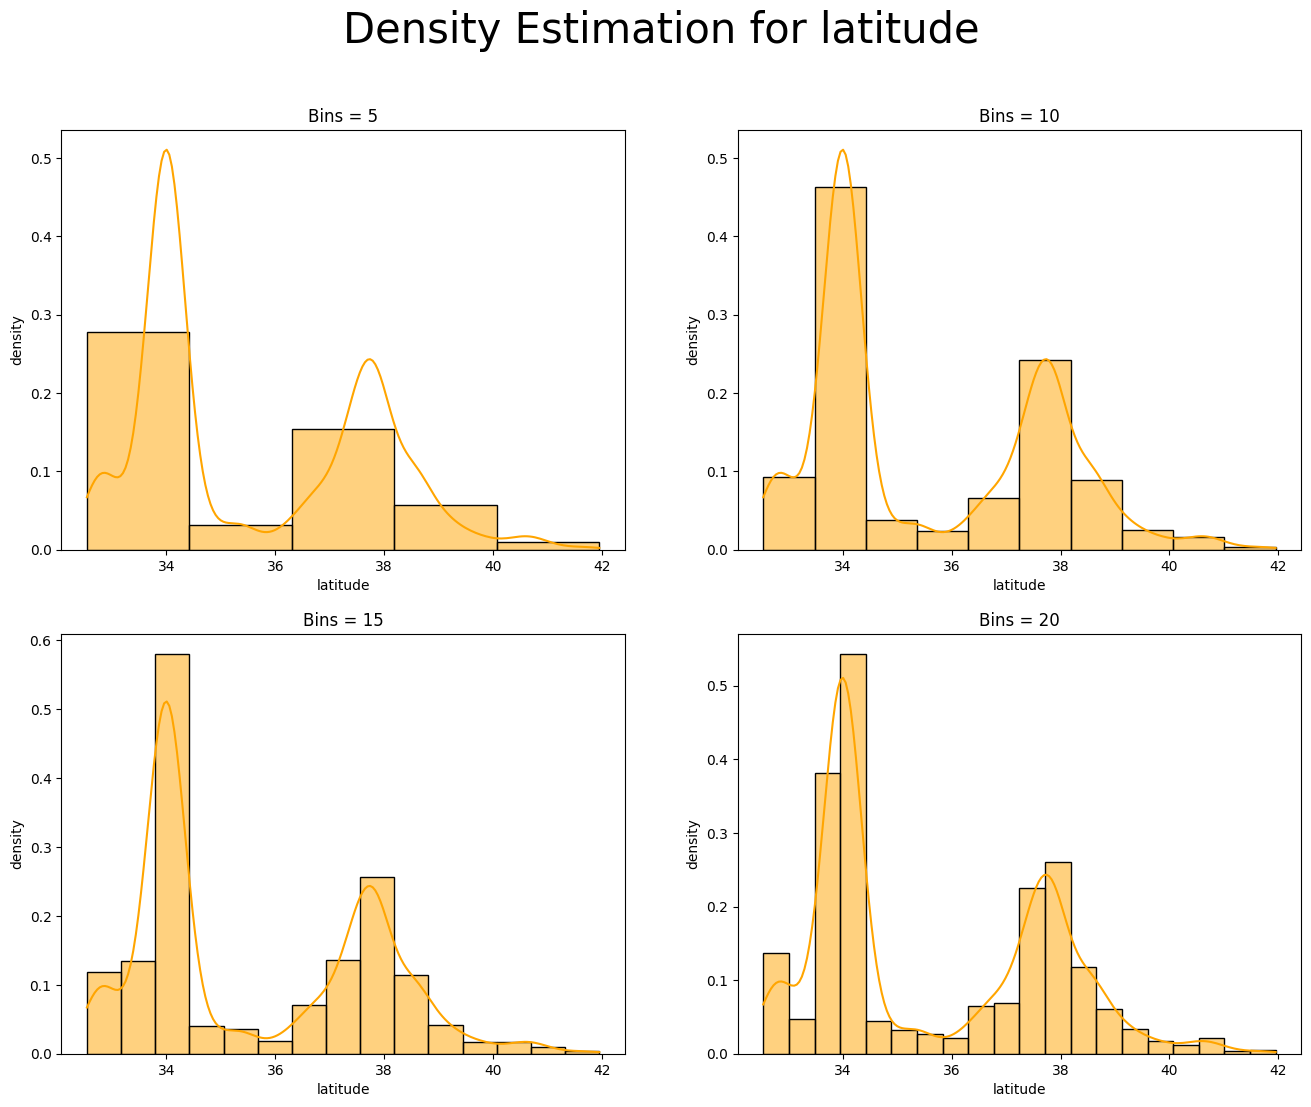

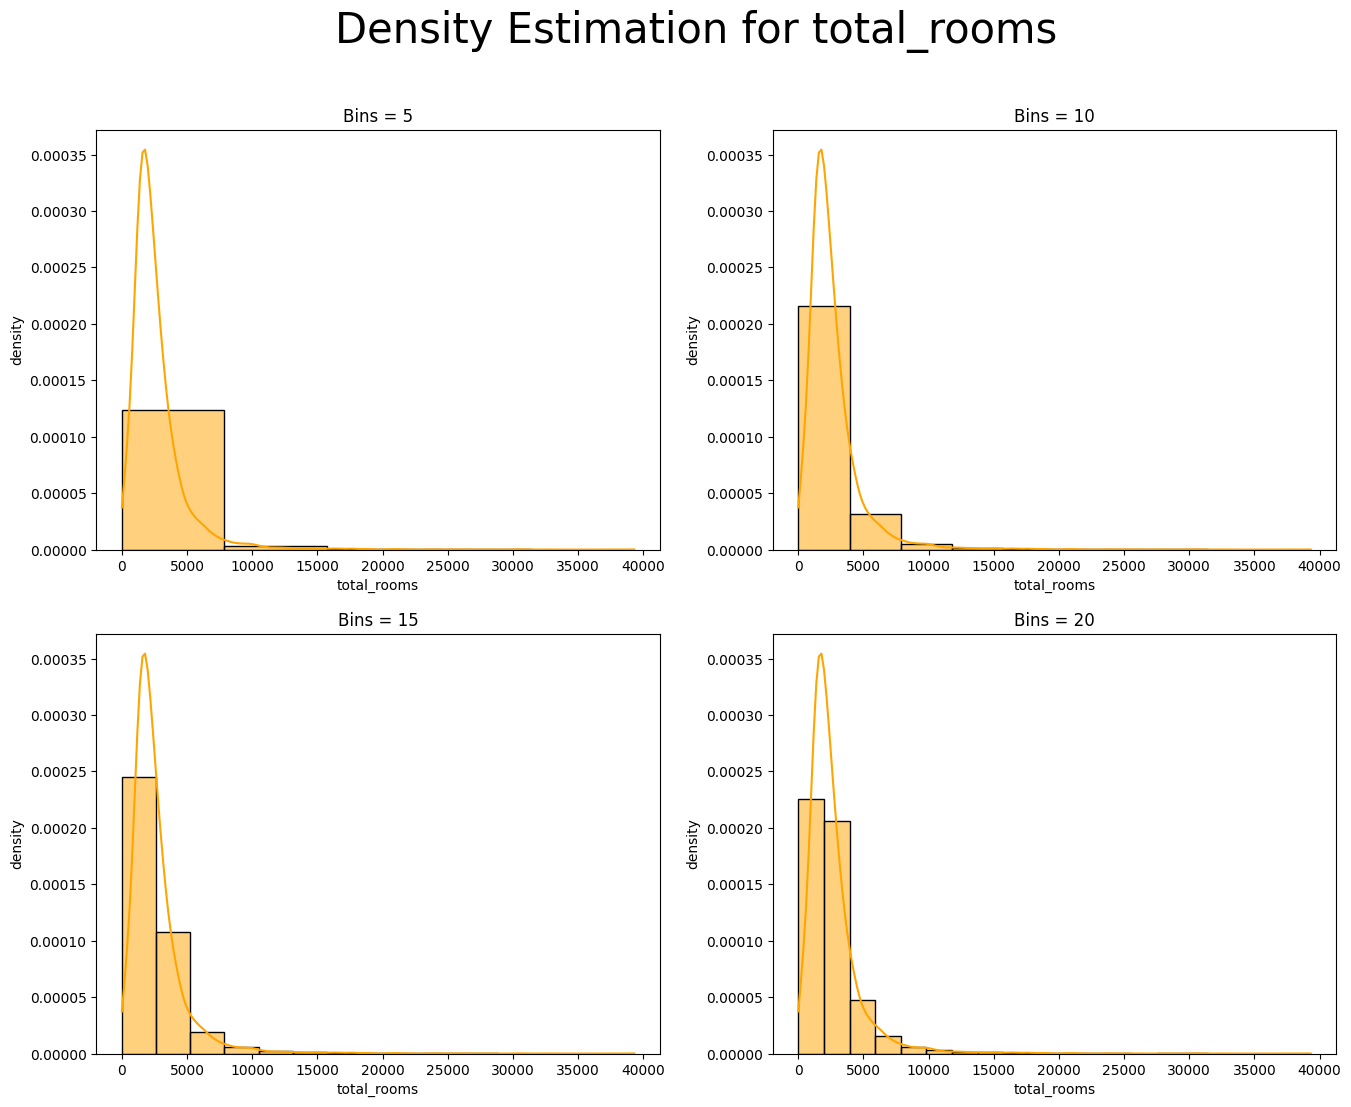

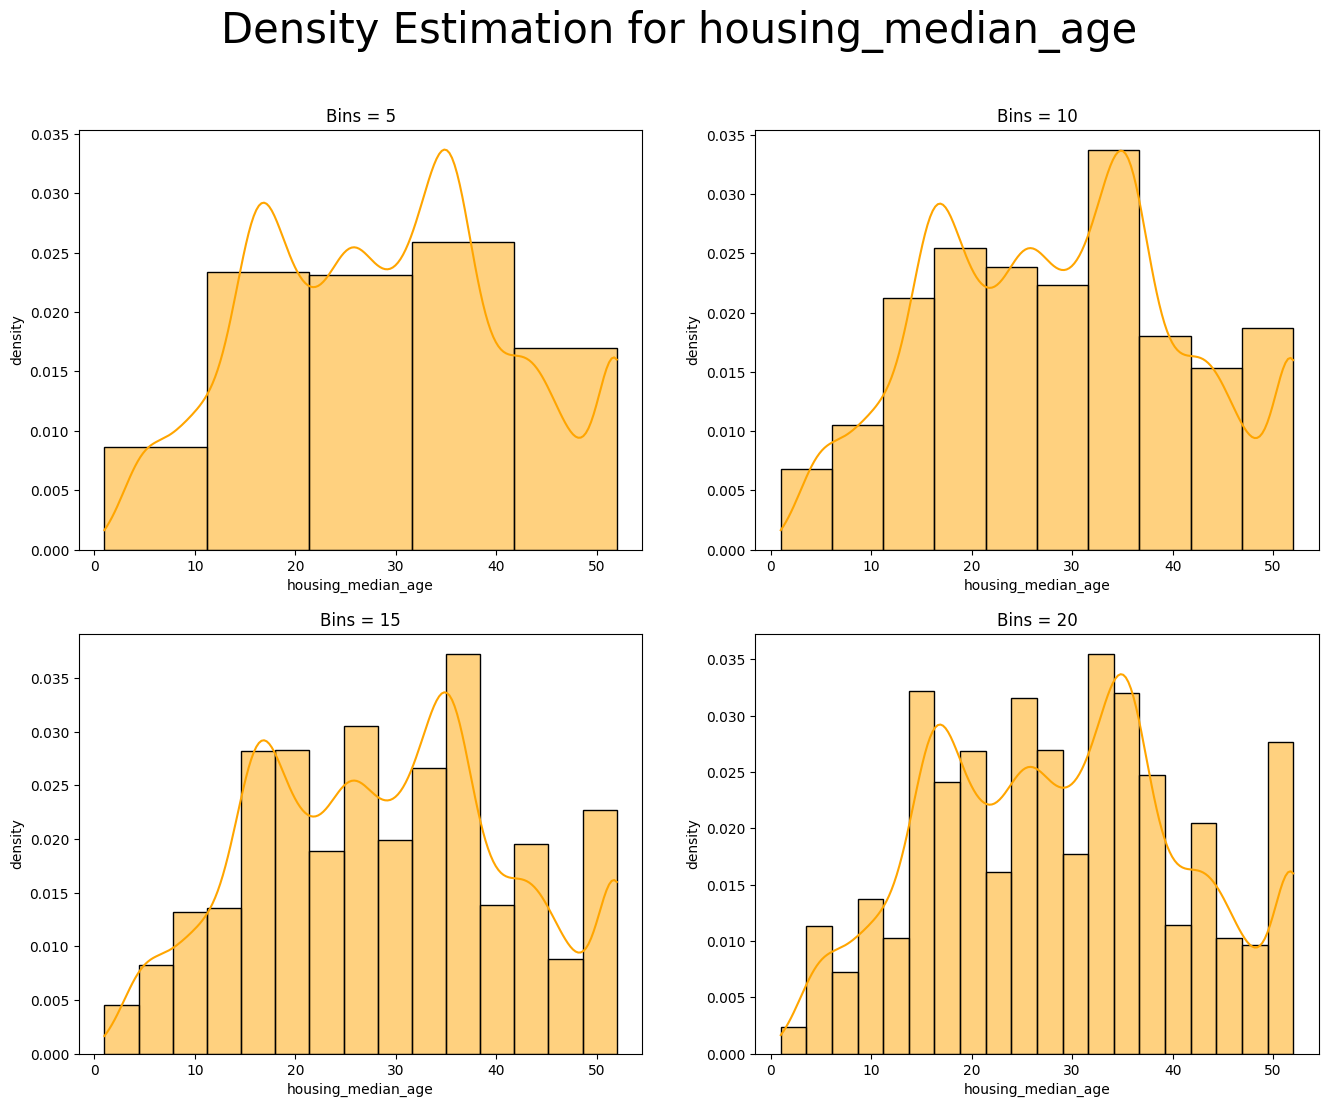

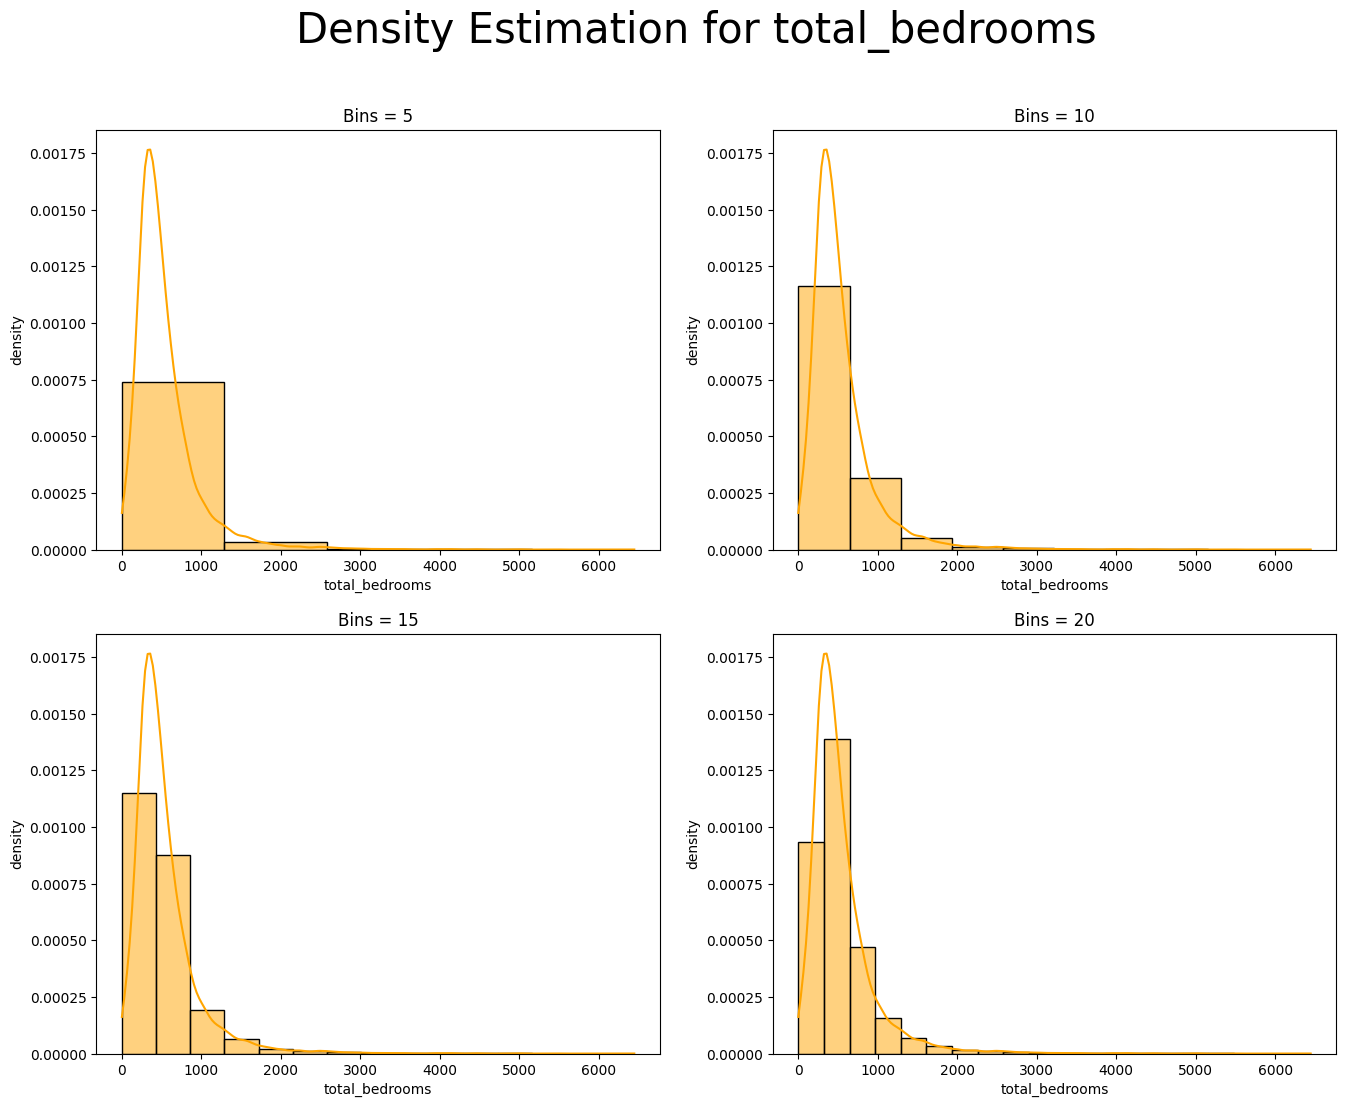

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/archive (4).zip')
columns = ['latitude','total_rooms','housing_median_age','total_bedrooms']

bins = [5, 10, 15, 20]
for column in columns:
    plt.figure(figsize=(16, 12))
    plt.suptitle(f'Density Estimation for {column}', fontsize=30)

    for i, bin_size in enumerate(bins, 1):
        plt.subplot(2, 2, i)
        sns.histplot(df[column], bins=bin_size, kde=True, color='orange',stat="density")
        plt.title(f'Bins = {bin_size}')
        plt.xlabel(column)
        plt.ylabel('density')